## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_11050_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (94035, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er   pac        lng  \
0      GSABZT025K000A230910107  2024-01-20 16:00:00  NaN  1.26  109.13116   
1      GSABZT025K000A230910107  2024-01-20 16:05:00  NaN  0.99  109.13116   
2      GSABZT025K000A230910107  2024-01-20 16:10:00  NaN  1.15  109.13116   
3      GSABZT025K000A230910107  2024-01-20 16:15:00  NaN  1.20  109.13116   
4      GSABZT025K000A230910107  2024-01-20 16:20:00  NaN  1.17  109.13116   
...                        ...                  ...  ...   ...        ...   
94030  GSABZT025K000A230910107  2025-05-10 18:45:00  0.0  0.04  109.13116   
94031  GSABZT025K000A230910107  2025-05-10 18:50:00  0.0  0.04  109.13116   
94032  GSABZT025K000A230910107  2025-05-10 18:55:00  0.0  0.04  109.13116   
94033  GSABZT025K000A230910107  2025-05-10 19:00:00  0.0  0.04  109.13116   
94034  GSABZT025K000A230910107  2025-05-10 19:05:00  0.0  0.02  109.13116   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      22.341574     阳光棚双坡    5.0         14.7308               66.6970  ...   
1      22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   
2      22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   
3      22.341574     阳光棚双坡    5.0         14.6163               66.6293  ...   
4      22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   
...          ...       ...    ...             ...                   ...  ...   
94030  22.341574     阳光棚双坡    5.0         24.3396               96.2574  ...   
94031  22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   
94032  22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   
94033  22.341574     阳光棚双坡    5.0         24.1421               96.4397  ...   
94034  22.341574     阳光棚双坡    5.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                       14.0455           114.7079          6.3260   
1                           NaN                NaN             NaN   
2                           NaN                NaN             NaN   
3                       11.2438            99.2350          6.2653   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
94030                    5.2126             6.2163          2.0764   
94031                       NaN                NaN             NaN   
94032                       NaN                NaN             NaN   
94033                    2.6063             3.1082          2.3410   
94034                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0              8.7416           9.3107             10.7521   
1                 NaN              NaN                 NaN   
2                 NaN              NaN                 NaN   
3              8.6927           9.2659             11.3234   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
94030          3.7284           4.1816             36.2163   
94031             NaN              NaN                 NaN   
94032             NaN              NaN                 NaN   
94033          4.2187           4.7341             34.1636   
94034             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                 10.9472              11.0201  2024-01-20 16:00:00   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                 11.5398              11.6201  2024-01-20 16:15:00   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
94030             38.1830              38.6526  2025-05-10 

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-01-20 16:00:00  GSABZT025K000A230910107  2024-01-20 16:00:00  NaN   
1      2024-01-20 16:05:00  GSABZT025K000A230910107  2024-01-20 16:05:00  NaN   
2      2024-01-20 16:10:00  GSABZT025K000A230910107  2024-01-20 16:10:00  NaN   
3      2024-01-20 16:15:00  GSABZT025K000A230910107  2024-01-20 16:15:00  NaN   
4      2024-01-20 16:20:00  GSABZT025K000A230910107  2024-01-20 16:20:00  NaN   
...                    ...                      ...                  ...  ...   
137121 2025-05-10 18:45:00  GSABZT025K000A230910107  2025-05-10 18:45:00  0.0   
137122 2025-05-10 18:50:00  GSABZT025K000A230910107  2025-05-10 18:50:00  0.0   
137123 2025-05-10 18:55:00  GSABZT025K000A230910107  2025-05-10 18:55:00  0.0   
137124 2025-05-10 19:00:00  GSABZT025K000A230910107  2025-05-10 19:00:00  0.0   
137125 2025-05-10 19:05:00  GSABZT025K000A230910107  2025-05-10 19:05:00  0.0   

         pac        lng        lat roof_type  angle  temperature_2m  ...  \
0       1.26  109.13116  22.341574     阳光棚双坡    5.0         14.7308  ...   
1       0.99  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   
2       1.15  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   
3       1.20  109.13116  22.341574     阳光棚双坡    5.0         14.6163  ...   
4       1.17  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   
...      ...        ...        ...       ...    ...             ...  ...   
137121  0.04  109.13116  22.341574     阳光棚双坡    5.0         24.3396  ...   
137122  0.04  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   
137123  0.04  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   
137124  0.04  109.13116  22.341574     阳光棚双坡    5.0         24.1421  ...   
137125  0.02  109.13116  22.341574     阳光棚双坡    5.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                 5.8023                   14.0455           114.7079   
1                    NaN                       NaN                NaN   
2                    NaN                       NaN                NaN   
3                 4.4137                   11.2438            99.2350   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
137121            0.8880                    5.2126             6.2163   
137122               NaN                       NaN                NaN   
137123               NaN                       NaN                NaN   
137124            0.4440                    2.6063             3.1082   
137125               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0               6.3260          8.7416           9.3107             10.7521   
1                  NaN             NaN              NaN                 NaN   
2                  NaN             NaN              NaN                 NaN   
3               6.2653          8.6927           9.2659             11.3234   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
137121          2.0764          3.7284           4.1816             36.2163   
137122             NaN             NaN              NaN                 NaN   
137123             NaN             NaN              NaN                 NaN   
137124          2.3410          4.2187           4.7341             34.1636   
137125             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                  10.9472              11.0201  2024-01-20 16:00:00  
1                      NaN                  NaN                  NaN  
2                      NaN                  NaN                  NaN  
3                  11

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    36,     37,     38,     39,     40,     41,     42,     43,     44,
            45,
        ...
        136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967,
        136968],
       dtype='int64', length=64616),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    36,     37,     38,     39,     40,     41,     42,     43,     44,
            45,
        ...
        136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967,
        136968],
       dtype='int64', length=64616),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967,
        136968],
       dtype='int64', length=65333),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    36,     37,     38,     39,     40,     41,     42,     43,     44,
            45,
        ...
        136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967,
        136968],
       dtype='int64', length=64616),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    36,     37,     38,     39,     40,     41,     42,     43,     44,
            45,
        ...
        136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967,
        136968],
       dtype='int64', length=64616),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     1,      2,      4,      5,      7,      8,     10,     11,     13,
            14,
        ...
        137111, 137113, 137114, 137116, 137117, 137119, 137120, 137122, 137123,
        137125],
       dtype='int64', length=91417),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-01-20 16:00:00  GSABZT025K000A230910107  2024-01-20 16:00:00  0.0   
1      2024-01-20 16:05:00  GSABZT025K000A230910107  2024-01-20 16:05:00  0.0   
2      2024-01-20 16:10:00  GSABZT025K000A230910107  2024-01-20 16:10:00  0.0   
3      2024-01-20 16:15:00  GSABZT025K000A230910107  2024-01-20 16:15:00  0.0   
4      2024-01-20 16:20:00  GSABZT025K000A230910107  2024-01-20 16:20:00  0.0   
...                    ...                      ...                  ...  ...   
137121 2025-05-10 18:45:00  GSABZT025K000A230910107  2025-05-10 18:45:00  0.0   
137122 2025-05-10 18:50:00  GSABZT025K000A230910107  2025-05-10 18:50:00  0.0   
137123 2025-05-10 18:55:00  GSABZT025K000A230910107  2025-05-10 18:55:00  0.0   
137124 2025-05-10 19:00:00  GSABZT025K000A230910107  2025-05-10 19:00:00  0.0   
137125 2025-05-10 19:05:00  GSABZT025K000A230910107  2025-05-10 19:05:00  0.0   

         pac        lng        lat roof_type  angle  temperature_2m  ...  \
0       1.26  109.13116  22.341574     阳光棚双坡    5.0       14.730800  ...   
1       0.99  109.13116  22.341574     阳光棚双坡    5.0       14.692633  ...   
2       1.15  109.13116  22.341574     阳光棚双坡    5.0       14.654467  ...   
3       1.20  109.13116  22.341574     阳光棚双坡    5.0       14.616300  ...   
4       1.17  109.13116  22.341574     阳光棚双坡    5.0       14.603000  ...   
...      ...        ...        ...       ...    ...             ...  ...   
137121  0.04  109.13116  22.341574     阳光棚双坡    5.0       24.339600  ...   
137122  0.04  109.13116  22.341574     阳光棚双坡    5.0       24.273767  ...   
137123  0.04  109.13116  22.341574     阳光棚双坡    5.0       24.207933  ...   
137124  0.04  109.13116  22.341574     阳光棚双坡    5.0       24.142100  ...   
137125  0.02  109.13116  22.341574     阳光棚双坡    5.0       24.142100  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0               5.802300                 14.045500         114.707900   
1               5.339433                 13.111600         109.550267   
2               4.876567                 12.177700         104.392633   
3               4.413700                 11.243800          99.235000   
4               3.934333                 10.120633          93.597967   
...                  ...                       ...                ...   
137121          0.888000                  5.212600           6.216300   
137122          0.740000                  4.343833           5.180267   
137123          0.592000                  3.475067           4.144233   
137124          0.444000                  2.606300           3.108200   
137125          0.444000                  2.606300           3.108200   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0             6.326000        8.741600         9.310700           10.752100   
1             6.305767        8.725300         9.295767           10.942533   
2             6.285533        8.709000         9.280833           11.132967   
3             6.265300        8.692700         9.265900           11.323400   
4             6.263633        8.704067         9.280900           11.611433   
...                ...             ...              ...                 ...   
137121        2.076400        3.728400         4.181600           36.216300   
137122        2.164600        3.891833         4.365767           35.532067   
137123        2.252800        4.055267         4.549933           34.847833   
137124        2.341000        4.218700         4.734100           34.163600   
137125        2.341000        4.218700         4.734100           34.163600   

        wind_direction_80m  wind_direction_120m        variable_date  
0                10.947200            11.020100  2024-01-20 16:00:00  
1                11.144733            11.220100                  NaN  
2                11.342267            11.420100                  NaN  
3                11.5

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([], dtype='int64'), False)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=137126, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-01-20 16:00:00 2024-01-20 16:00:00  GSABZT025K000A230910107   
2024-01-20 16:05:00 2024-01-20 16:05:00  GSABZT025K000A230910107   
2024-01-20 16:10:00 2024-01-20 16:10:00  GSABZT025K000A230910107   
2024-01-20 16:15:00 2024-01-20 16:15:00  GSABZT025K000A230910107   
2024-01-20 16:20:00 2024-01-20 16:20:00  GSABZT025K000A230910107   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT025K000A230910107   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT025K000A230910107   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT025K000A230910107   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT025K000A230910107   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT025K000A230910107   

                                     ts   er   pac        lng        lat  \
ts                                                                         
2024-01-20 16:00:00 2024-01-20 16:00:00  0.0  1.26  109.13116  22.341574   
2024-01-20 16:05:00 2024-01-20 16:05:00  0.0  0.99  109.13116  22.341574   
2024-01-20 16:10:00 2024-01-20 16:10:00  0.0  1.15  109.13116  22.341574   
2024-01-20 16:15:00 2024-01-20 16:15:00  0.0  1.20  109.13116  22.341574   
2024-01-20 16:20:00 2024-01-20 16:20:00  0.0  1.17  109.13116  22.341574   
...                                 ...  ...   ...        ...        ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.04  109.13116  22.341574   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.04  109.13116  22.341574   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.04  109.13116  22.341574   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.04  109.13116  22.341574   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  109.13116  22.341574   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-01-20 16:00:00     阳光棚双坡    5.0       14.730800  ...          5.802300   
2024-01-20 16:05:00     阳光棚双坡    5.0       14.692633  ...          5.339433   
2024-01-20 16:10:00     阳光棚双坡    5.0       14.654467  ...          4.876567   
2024-01-20 16:15:00     阳光棚双坡    5.0       14.616300  ...          4.413700   
2024-01-20 16:20:00     阳光棚双坡    5.0       14.603000  ...          3.934333   
...                       ...    ...             ...  ...               ...   
2025-05-10 18:45:00     阳光棚双坡    5.0       24.339600  ...          0.888000   
2025-05-10 18:50:00     阳光棚双坡    5.0       24.273767  ...          0.740000   
2025-05-10 18:55:00     阳光棚双坡    5.0       24.207933  ...          0.592000   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.142100  ...          0.444000   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.142100  ...          0.444000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-01-20 16:00:00                 14.045500         114.707900   
2024-01-20 16:05:00                 13.111600         109.550267   
2024-01-20 16:10:00                 12.177700         104.392633   
2024-01-20 16:15:00                 11.243800          99.235000   
2024-01-20 16:20:00                 10.120633          93.597967   
...                                       ...                ...   
2025-05-10 18:45:00                  5.212600           6.216300   
2025-05-10 18:50:00                  4.343833           5.180267   
2025-05-10 18:55:00                  3.475067           4.144233   
2025-05-10 19:00:00                  2.606300           3.108200   
2025-05-10 19:05:00                  2.606300           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-01-20 16:00:00        6.326000        8.741600         9.310700   
2024-01-20 16:05:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-01-20 16:00:00 2024-01-20 16:00:00  GSABZT025K000A230910107   
2024-01-20 16:05:00 2024-01-20 16:05:00  GSABZT025K000A230910107   
2024-01-20 16:10:00 2024-01-20 16:10:00  GSABZT025K000A230910107   
2024-01-20 16:15:00 2024-01-20 16:15:00  GSABZT025K000A230910107   
2024-01-20 16:20:00 2024-01-20 16:20:00  GSABZT025K000A230910107   
...                                 ...                      ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  GSABZT025K000A230910107   
2025-05-10 18:50:00 2025-05-10 18:50:00  GSABZT025K000A230910107   
2025-05-10 18:55:00 2025-05-10 18:55:00  GSABZT025K000A230910107   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT025K000A230910107   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT025K000A230910107   

                                     ts   er   pac        lng        lat  \
2024-01-20 16:00:00 2024-01-20 16:00:00  0.0  1.26  109.13116  22.341574   
2024-01-20 16:05:00 2024-01-20 16:05:00  0.0  0.99  109.13116  22.341574   
2024-01-20 16:10:00 2024-01-20 16:10:00  0.0  1.15  109.13116  22.341574   
2024-01-20 16:15:00 2024-01-20 16:15:00  0.0  1.20  109.13116  22.341574   
2024-01-20 16:20:00 2024-01-20 16:20:00  0.0  1.17  109.13116  22.341574   
...                                 ...  ...   ...        ...        ...   
2025-05-10 18:45:00 2025-05-10 18:45:00  0.0  0.04  109.13116  22.341574   
2025-05-10 18:50:00 2025-05-10 18:50:00  0.0  0.04  109.13116  22.341574   
2025-05-10 18:55:00 2025-05-10 18:55:00  0.0  0.04  109.13116  22.341574   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.04  109.13116  22.341574   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.02  109.13116  22.341574   

                    roof_type  angle  temperature_2m  ...  \
2024-01-20 16:00:00     阳光棚双坡    5.0       14.730800  ...   
2024-01-20 16:05:00     阳光棚双坡    5.0       14.692633  ...   
2024-01-20 16:10:00     阳光棚双坡    5.0       14.654467  ...   
2024-01-20 16:15:00     阳光棚双坡    5.0       14.616300  ...   
2024-01-20 16:20:00     阳光棚双坡    5.0       14.603000  ...   
...                       ...    ...             ...  ...   
2025-05-10 18:45:00     阳光棚双坡    5.0       24.339600  ...   
2025-05-10 18:50:00     阳光棚双坡    5.0       24.273767  ...   
2025-05-10 18:55:00     阳光棚双坡    5.0       24.207933  ...   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.142100  ...   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.142100  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-01-20 16:00:00                 14.045500         114.707900   
2024-01-20 16:05:00                 13.111600         109.550267   
2024-01-20 16:10:00                 12.177700         104.392633   
2024-01-20 16:15:00                 11.243800          99.235000   
2024-01-20 16:20:00                 10.120633          93.597967   
...                                       ...                ...   
2025-05-10 18:45:00                  5.212600           6.216300   
2025-05-10 18:50:00                  4.343833           5.180267   
2025-05-10 18:55:00                  3.475067           4.144233   
2025-05-10 19:00:00                  2.606300           3.108200   
2025-05-10 19:05:00                  2.606300           3.108200   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-01-20 16:00:00        6.326000        8.741600         9.310700   
2024-01-20 16:05:00        6.305767        8.725300         9.295767   
2024-01-20 16:10:00        6.285533        8.709000         9.280833   
2024-01-20 16:15:00        6.265300        8.692700         9.265900   
2024-01-20 16:20:00        6.263633        8.704067         9.280900   
...                             ...             ...              ...   
2025-05-10 18:45:00        2.076400        3.728400         4.181600   
2025-05-10 18:50:00        2.164600        3.891833         4.365767   
2025-05-10 18:55:00        2.252800        4.055267         4.549933   
2025-05-10 19:00:00        2.3

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex([], dtype='datetime64[ns]', freq='5min'), False)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(137126, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    22.021380
1        relative_humidity_2m    75.833974
2                dew_point_2m    17.291549
3                pressure_msl  1012.681729
4            surface_pressure  1007.656132
5   precipitation_probability    22.281882
6                 cloud_cover    66.508123
7             cloud_cover_low    35.366882
8             cloud_cover_mid    25.280153
9            cloud_cover_high    37.161718
10        shortwave_radiation   170.260078
11           direct_radiation    93.751930
12   direct_normal_irradiance   140.906139
13          diffuse_radiation    76.508148
14             wind_speed_10m     3.264383
15             wind_speed_80m     5.144443
16            wind_speed_120m     5.642913
17         wind_direction_10m   108.428650
18         wind_direction_80m   106.318255
19        wind_direction_120m   106.484829
20                   pac_copy     3.045586

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     42.849304
1        relative_humidity_2m    271.842364
2                dew_point_2m     60.818650
3                pressure_msl     54.254951
4            surface_pressure     52.355781
5   precipitation_probability   1444.925056
6                 cloud_cover   1567.778052
7             cloud_cover_low   1620.475880
8             cloud_cover_mid   1217.002604
9            cloud_cover_high   1791.427735
10        shortwave_radiation  57442.111845
11           direct_radiation  28216.546609
12   direct_normal_irradiance  50473.841657
13          diffuse_radiation   9794.896385
14             wind_speed_10m      2.437497
15             wind_speed_80m      4.708780
16            wind_speed_120m      5.474014
17         wind_direction_10m   7015.498686
18         wind_direction_80m   6675.458132
19        wind_direction_120m   6669.155105
20                   pac_copy     24.698864

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.545938
1        relative_humidity_2m           16.487643
2                dew_point_2m            7.798631
3                pressure_msl            7.365796
4            surface_pressure            7.235729
5   precipitation_probability           38.012170
6                 cloud_cover           39.595177
7             cloud_cover_low           40.255135
8             cloud_cover_mid           34.885564
9            cloud_cover_high           42.325261
10        shortwave_radiation          239.670841
11           direct_radiation          167.977816
12   direct_normal_irradiance          224.663841
13          diffuse_radiation           98.969169
14             wind_speed_10m            1.561248
15             wind_speed_80m            2.169972
16            wind_speed_120m            2.339661
17         wind_direction_10m           83.758574
18         wind_direction_80m           81.703477
19        wind_direction_120m           81.664895
20                   pac_copy            4.969795

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.3995
1        relative_humidity_2m    99.5180
2                dew_point_2m    27.8322
3                pressure_msl  1034.4896
4            surface_pressure  1029.1942
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.7738
11           direct_radiation   756.1621
12   direct_normal_irradiance   868.3231
13          diffuse_radiation   435.4331
14             wind_speed_10m    10.1019
15             wind_speed_80m    15.3222
16            wind_speed_120m    16.6301
17         wind_direction_10m   359.4439
18         wind_direction_80m   357.7216
19        wind_direction_120m   357.8576
20                   pac_copy    26.7300

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     2.5810
1        relative_humidity_2m    20.8342
2                dew_point_2m    -7.8293
3                pressure_msl   992.1323
4            surface_pressure   987.3857
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.1399
15             wind_speed_80m     0.2252
16            wind_speed_120m     0.2201
17         wind_direction_10m     1.4145
18         wind_direction_80m     1.5037
19        wind_direction_120m     0.9895
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    23.524117
1        relative_humidity_2m    78.551800
2                dew_point_2m    19.761117
3                pressure_msl  1012.196217
4            surface_pressure  1007.199083
5   precipitation_probability     0.000000
6                 cloud_cover    92.069600
7             cloud_cover_low    13.200683
8             cloud_cover_mid     6.943783
9            cloud_cover_high    10.391433
10        shortwave_radiation    16.888700
11           direct_radiation     1.221467
12   direct_normal_irradiance     4.892133
13          diffuse_radiation    12.847433
14             wind_speed_10m     3.173800
15             wind_speed_80m     5.177983
16            wind_speed_120m     5.724600
17         wind_direction_10m   115.926400
18         wind_direction_80m   114.384800
19        wind_direction_120m   115.208350
20                   pac_copy     0.020000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       19.912456             69.521978     14.125500     1008.2230   
0.666667       25.896156             86.480767     23.080867     1016.1922   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1003.289078                     0.0000    48.803911   
0.666667       1011.128867                     0.5188    99.965289   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         3.050700         1.393867          0.003500  ...   
0.666667        46.036611        20.098622         63.757222  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                  0.000000           0.000000   
0.666667         38.273211                 89.196156         105.488533   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333          2.3906        4.163344         4.620478           33.657933   
0.666667          3.9322        6.089222         6.673800          156.976333   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           31.953878            32.375267       0.0  
0.666667          154.959422           154.942822       2.3  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.128276      0.873883   
relative_humidity_2m             0.128276              1.000000      0.589655   
dew_point_2m                     0.873883              0.589655      1.000000   
pressure_msl                    -0.831947             -0.426106     -0.883391   
surface_pressure                -0.827103             -0.429563     -0.881162   
precipitation_probability        0.131782              0.304793      0.252526   
cloud_cover                     -0.034462              0.308130      0.123881   
cloud_cover_low                 -0.270147              0.256109     -0.091858   
cloud_cover_mid                 -0.402080              0.030796     -0.309409   
cloud_cover_high                 0.404367              0.283016      0.462932   
shortwave_radiation              0.400273             -0.402291      0.129974   
direct_radiation                 0.366554             -0.425579      0.086090   
direct_normal_irradiance         0.335423             -0.475788      0.033262   
diffuse_radiation                0.347188             -0.251893      0.168637   
wind_speed_10m                  -0.133441             -0.243946     -0.215098   
wind_speed_80m                  -0.222375             -0.152649     -0.242988   
wind_speed_120m                 -0.239357             -0.130280     -0.246064   
wind_direction_10m               0.468717              0.174298      0.461608   
wind_direction_80m               0.510808              0.211252      0.514561   
wind_direction_120m              0.516891              0.223989      0.525739   
pac_copy                         0.397565             -0.410758      0.120652   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.831947         -0.827103   
relative_humidity_2m          -0.426106         -0.429563   
dew_point_2m                  -0.883391         -0.881162   
pressure_msl                   1.000000          0.999962   
surface_pressure               0.999962          1.000000   
precipitation_probability     -0.198039         -0.198633   
cloud_cover                   -0.078860         -0.080471   
cloud_cover_low                0.180327          0.178438   
cloud_cover_mid                0.342606          0.340698   
cloud_cover_high              -0.472541         -0.472371   
shortwave_radiation           -0.076382         -0.071240   
direct_radiation              -0.055446         -0.050548   
direct_normal_irradiance      -0.026381         -0.021571   
diffuse_radiation             -0.090864         -0.086726   
wind_speed_10m                 0.112978          0.112249   
wind_speed_80m                 0.123391          0.121450   
wind_speed_120m                0.124192          0.122007   
wind_direction_10m            -0.452278         -0.450828   
wind_direction_80m            -0.501936         -0.500471   
wind_direction_120m           -0.511278         -0.509841   
pac_copy                      -0.091745         -0.086847   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.131782    -0.034462   
relative_humidity_2m                        0.304793     0.308130   
dew_point_2m                                0.252526     0.123881   
pressure_msl                               -0.198039    -0.078860   
surface_pressure                           -0.198633    -0.080471   
precipitation_probability                   1.000000     0.354465   
cloud_cover                                 0.354465     1.000000   
cloud_cover_low                             0.308432     0.581401   
cloud_cover_mid                             0.304464     0.473413   
cloud_cover_high                            0.282800     0.557514   
shortwave_radiation                         0.121181    -0.112334   
direct_radiation                            0.015364    -0.254205   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.763335
1        relative_humidity_2m          0.440734
2                dew_point_2m          0.972620
3                pressure_msl          0.939581
4            surface_pressure          0.939334
5   precipitation_probability          0.272460
6                 cloud_cover          0.609268
7             cloud_cover_low          0.572735
8             cloud_cover_mid          0.613350
9            cloud_cover_high          0.668975
10        shortwave_radiation         -0.371157
11           direct_radiation         -0.234674
12   direct_normal_irradiance         -0.181647
13          diffuse_radiation         -0.402195
14             wind_speed_10m          0.609215
15             wind_speed_80m          0.686610
16            wind_speed_120m          0.673254
17         wind_direction_10m          0.425591
18         wind_direction_80m          0.547248
19        wind_direction_120m          0.564350
20                   pac_copy         -0.286757

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 92470.10127753, 329716.11786654, 149551.14683976]),
 'fft_periods': array([287, 288, 144])}

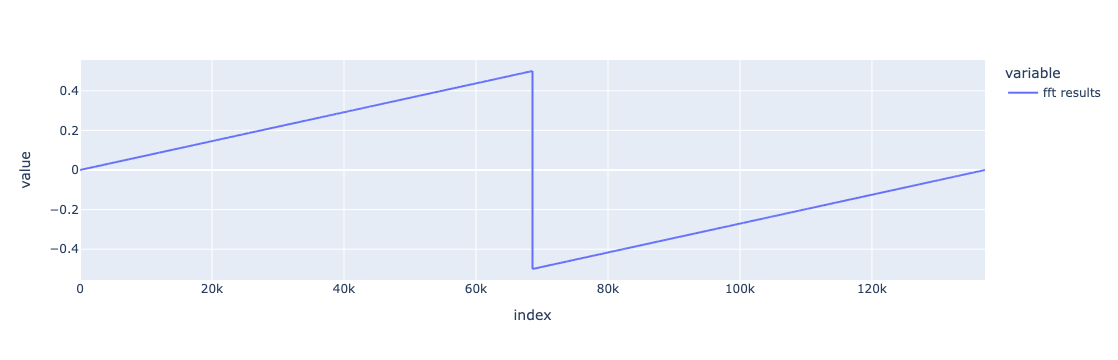

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -43.21696071169227,
  'P-value': 0.0,
  'Lags': np.int64(67),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -43.217
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-83.282951716654),
  'P-value': 0.0,
  'Lags': 74,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -83.283
  P-value                         0.000
  Lags                               74
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -38.23835776138475,
  'P-value': 0.0,
  'Lags': np.int64(67),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -38.238
  P-value                         0.000
  Lags                               67
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}